#  Applied Machine Learning 

## Homework 6: Putting it all together 



## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [2]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

### Here there are 24 Features which are as below:<br>

- **ID:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Identifier of Each Client
<br>
- **LIMIT_BAL:**&emsp;&emsp;&emsp;&emsp; Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br>
- **SEX:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Gender (1=male, 2=female)
<br>
- **EDUCATION:** &emsp;&emsp;&emsp;&ensp;(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br>
- **MARRIAGE:** &emsp;&emsp;&emsp;&emsp;Marital status (1=married, 2=single, 3=others)
<br>
- **AGE:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Age in years
<br>
- **PAY_1:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for &ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&nbsp;&emsp;&ensp;two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
<br><
- **PAY_2:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in August, 2005 (scale same as above)
<br><
- **PAY_3:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in July, 2005 (scale same as above)
<br>
- **PAY_4:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in June, 2005 (scale same as above)
<br>
- **PAY_5:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in May, 2005 (scale same as above)
<br>
- **PAY_6:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in April, 2005 (scale same as above)
<br>
- **BILL_AMT1:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in September, 2005 (NT dollar)
<br>
- **BILL_AMT2:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in August, 2005 (NT dollar)
<br>
- **BILL_AMT3:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in July, 2005 (NT dollar)
<br>
- **BILL_AMT4:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in June, 2005 (NT dollar)
<br>
- **BILL_AMT5:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in May, 2005 (NT dollar)
<br>
- **BILL_AMT6:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in April, 2005 (NT dollar)
<br>
- **PAY_AMT1:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in September, 2005 (NT dollar)
<br>
- **PAY_AMT2:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in August, 2005 (NT dollar)
<br>
- **PAY_AMT3:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in July, 2005 (NT dollar)
<br>
- **PAY_AMT4:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in June, 2005 (NT dollar)
<br>
- **PAY_AMT5:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in May, 2005 (NT dollar)
<br>
- **PAY_AMT6:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in April, 2005 (NT dollar)
<br>
- **DEFAULT:** &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Default payment (Fail to Pay) (1=yes, 0=no)

In [3]:
cc_data = pd.read_csv("UCI_Credit_Card.csv")
cc_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Here I am renaming the Columns Default and PAY_0 for convenience!**

In [4]:
cc_data.rename(columns={"default.payment.next.month":"Default","PAY_0":"PAY_1"},inplace=True)

In [5]:
cc_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# Some Basic Info of Dataset
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [7]:
# Some more Details
cc_data.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [8]:
df_train, df_test = train_test_split(cc_data,test_size=0.20,random_state=612)

In [9]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
21959,21960,150000.0,2,1,2,28,0,-1,-1,0,...,8992.0,4314.0,11131.0,4391.0,6269.0,8914.0,4300.0,11100.0,52900.0,0
1486,1487,230000.0,1,1,2,32,0,0,0,0,...,38426.0,42500.0,43531.0,10120.0,20000.0,10000.0,5000.0,5000.0,5000.0,0
586,587,220000.0,1,1,1,43,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27173,27174,160000.0,1,3,1,33,-1,-1,-1,-1,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0
23920,23921,50000.0,1,3,1,22,0,0,0,0,...,48456.0,44546.0,43256.0,2051.0,2200.0,2016.0,2009.0,2092.0,1020.0,1


In [10]:
X_train, y_train = df_train.drop(columns="Default"),df_train["Default"]
X_test, y_test = df_test.drop(columns="Default"),df_test["Default"]

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [11]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [12]:
df_train.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000
mean,15016.643375,168149.986667,1.604167,1.852583,1.555042,35.472208,-0.017750,-0.137000,-0.167750,-0.222083,...,43329.872417,40386.531375,38912.011750,5644.722625,5.932251e+03,5220.128750,4869.89450,4763.436750,5246.804917,0.222333
std,8653.784833,130295.758242,0.489039,0.790756,0.521119,9.207724,1.127011,1.197201,1.197916,1.166649,...,64713.078527,61041.955911,59578.111641,16598.320368,2.171256e+04,17864.071893,15913.71479,14629.594269,17872.680686,0.415823
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7541.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2395.750000,1799.750000,1269.750000,1000.000000,8.360000e+02,390.000000,300.00000,243.750000,150.000000,0.000000
50%,14981.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18041.000000,17065.500000,2116.500000,2.014000e+03,1819.000000,1500.00000,1500.000000,1500.000000,0.000000
75%,22510.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54610.250000,50343.750000,49327.500000,5006.000000,5.000000e+03,4529.250000,4026.00000,4024.000000,4001.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.00000,426529.000000,527143.000000,1.000000


### Checking for Missing Values in All Columns

In [13]:
df_train.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

### Exploring the Column `LIMIT_BAL`

In [14]:
sns.set(style="darkgrid")

In [15]:
df_train["LIMIT_BAL"].nunique() # Number of Unqiue LIMIT_BAL Values

81

In [16]:
df_train["LIMIT_BAL"].describe()

count      24000.000000
mean      168149.986667
std       130295.758242
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [17]:
import matplotlib.ticker as ticker

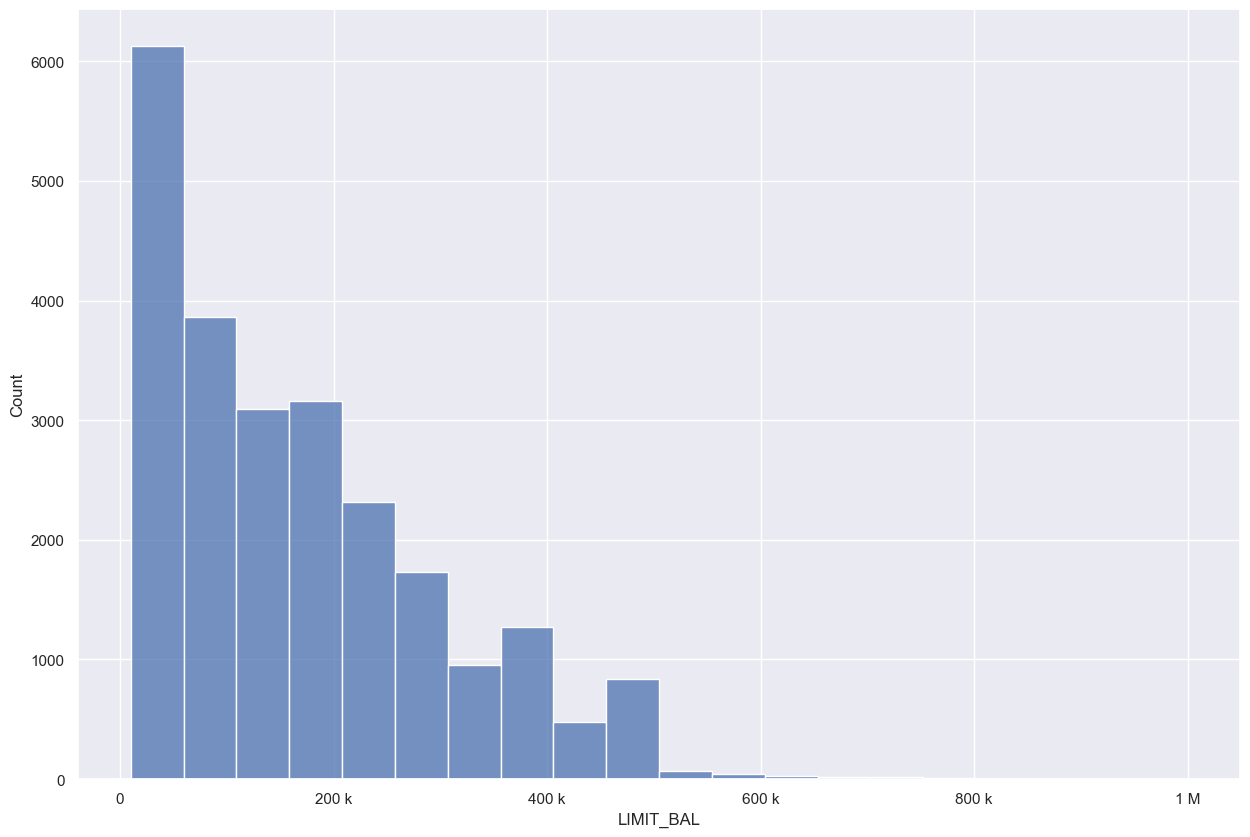

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.histplot(ax=ax,data=df_train,x="LIMIT_BAL",bins=20)
ax.xaxis.set_major_formatter(ticker.EngFormatter())

### Exploring the Column `SEX`, `EDUCATION`, `MARRIAGE` Altogether!

In [19]:
df_train["SEX"].value_counts()

SEX
2    14500
1     9500
Name: count, dtype: int64

In [20]:
df_train["EDUCATION"].value_counts()
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

EDUCATION
2    11179
1     8488
3     3962
5      218
4       97
6       42
0       14
Name: count, dtype: int64

In [21]:
df_train["MARRIAGE"].value_counts()
# (1=married, 2=single, 3=others)

MARRIAGE
2    12851
1    10854
3      255
0       40
Name: count, dtype: int64

In [22]:
sex_labels = ["Female","Male"]
education_labels = ["University","Graduate School","High School","Unknown_1","Others","Unknown_2","Missing"]
marriage_labels = ["Single","Married","Others","Missing"]

Text(0.5, 1.0, 'FOR MARRIAGE')

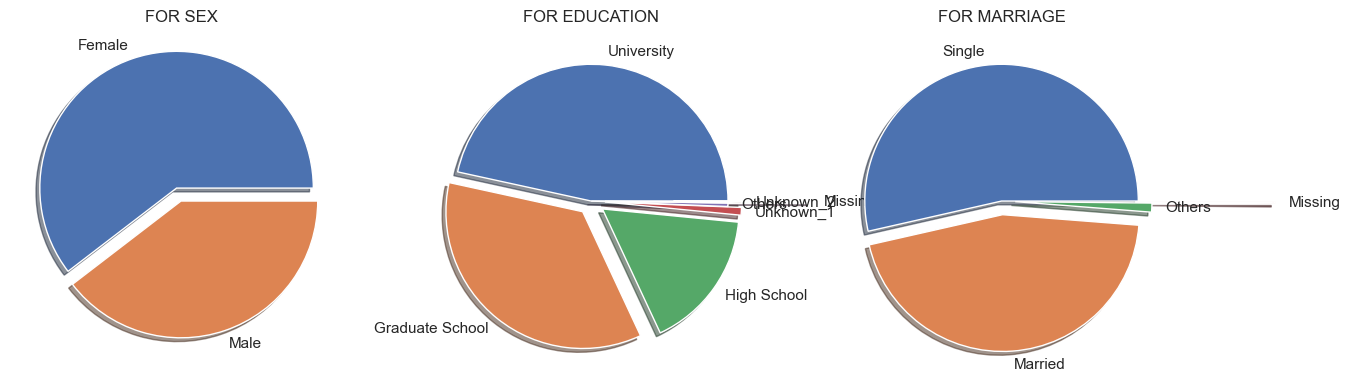

In [23]:
sns.set(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,30))
ax1.pie(df_train["SEX"].value_counts(),labels=sex_labels,explode=(0.1,0),shadow=True);
ax1.set_title("FOR SEX")
ax2.pie(df_train["EDUCATION"].value_counts(),labels=education_labels,explode=(0,0.1,0.1,0.1,0,0.1,0.6),shadow=True);
ax2.set_title("FOR EDUCATION")
ax3.pie(df_train["MARRIAGE"].value_counts(),labels=marriage_labels,explode=(0,0.1,0.1,1),shadow=True);
ax3.set_title("FOR MARRIAGE")

### My Observations from Above Pie Charts:
- Here from 1st Pie Chart of `SEX` , we can easily say Female are dominating!
- However there is so much confusion in 2nd Graph of `EDUCATION` as the Features like "Others", "Unknown_1", "Unknown_2", "Missing" are very much as Compared to Remaining Features and they are overlapping
- In 3rd pie chart of `MARRIAGE`, there is also confusion but not worse than 2nd Pie chart; in this case the "OTHERS" and "MISSING" are Overalapping!

### Exploring the Column `AGE` and `Default` Together 

In [24]:
df_train["AGE"].nunique()

55

In [32]:
df_train["Default"].value_counts()

Default
0    18664
1     5336
Name: count, dtype: int64

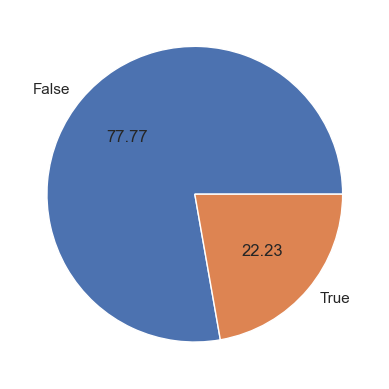

In [38]:
fig, ax = plt.subplots()
ax.pie(df_train["Default"].value_counts(),labels=["False","True"],autopct="%1.2f");

Text(0.5, 1.0, 'Distribution of AGE with Respect to Default')

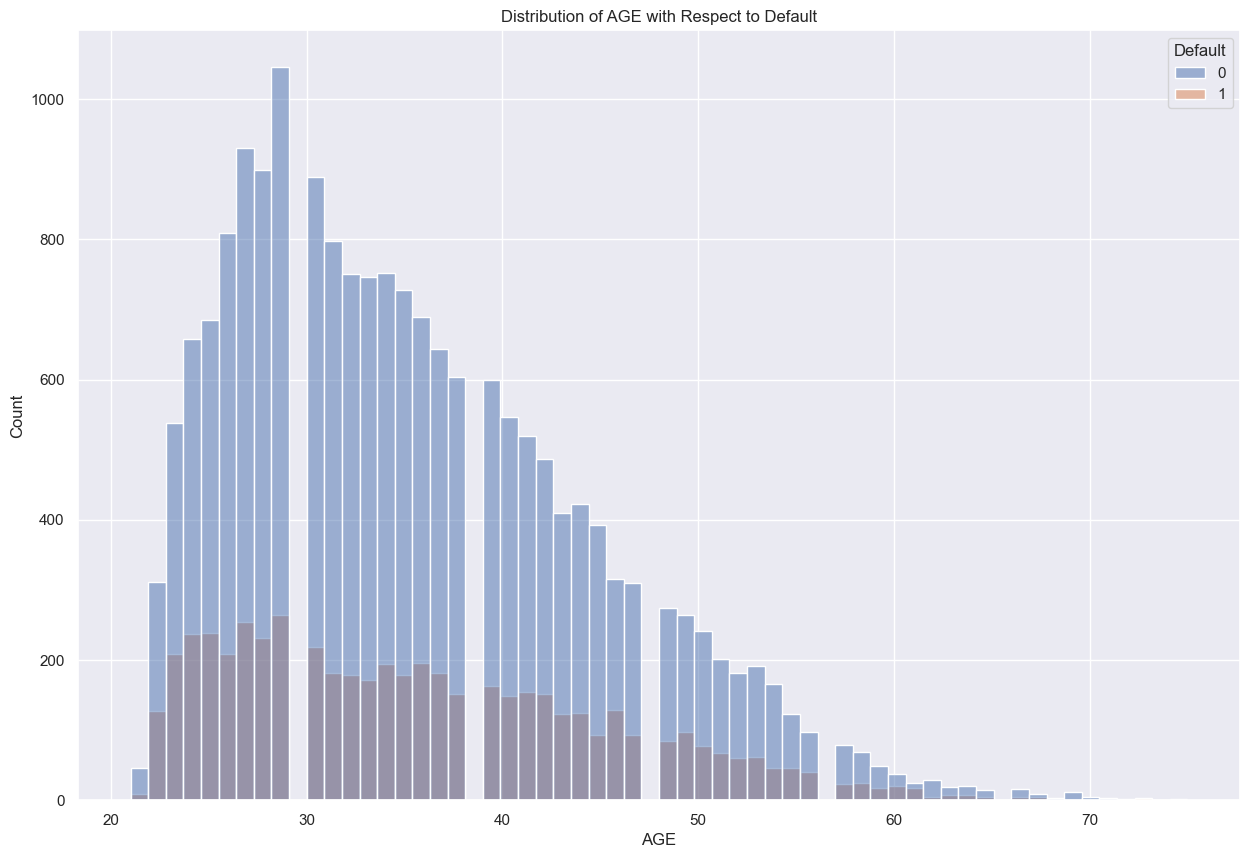

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=df_train,x="AGE",hue="Default")
ax.set_title("Distribution of AGE with Respect to Default")

- Maybe Accoording to me by observing the Above Histogram, the chances of Default to be `False` or in other words `0` is decreasing as Age Increases which also makes sense in Real Life Scenario!

### Seeing the Correlation between them !

Text(0.5, 1.0, 'Heatmap describing the Correlation')

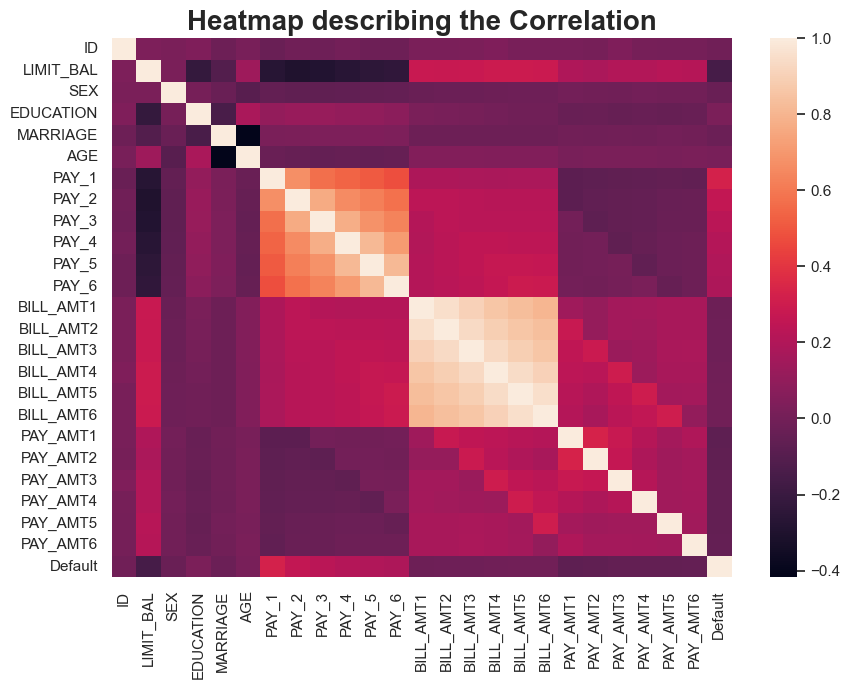

In [53]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_train.corr())
ax.set_title("Heatmap describing the Correlation",fontdict={"fontsize":20,"fontweight":"bold"})


<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [54]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [55]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
21959,21960,150000.0,2,1,2,28,0,-1,-1,0,...,8992.0,4314.0,11131.0,4391.0,6269.0,8914.0,4300.0,11100.0,52900.0,0
1486,1487,230000.0,1,1,2,32,0,0,0,0,...,38426.0,42500.0,43531.0,10120.0,20000.0,10000.0,5000.0,5000.0,5000.0,0
586,587,220000.0,1,1,1,43,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27173,27174,160000.0,1,3,1,33,-1,-1,-1,-1,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0
23920,23921,50000.0,1,3,1,22,0,0,0,0,...,48456.0,44546.0,43256.0,2051.0,2200.0,2016.0,2009.0,2092.0,1020.0,1


| Transformation     |      Columns      | 
|--------------------|-------------------|
| **Scaling**        | "LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"                   |
| **OneHotEncoding** | "EDUCATION", "MARRIAGE"                  |  
| **Binary**         | "SEX",                    |  
| **Drop**           | "ID"              |
| **Passthrough**    | "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"           | 

In [63]:
numerical_feats = ["LIMIT_BAL","AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
categorical_feats = ["EDUCATION","MARRIAGE"]
binary_feats = ["SEX"]
drop_feats = ["ID"]
passthrough_feats = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

In [78]:
ct = make_column_transformer(
    (StandardScaler(),numerical_feats),
    (OneHotEncoder(sparse=False),categorical_feats),
    (OneHotEncoder(drop="if_binary"),binary_feats),
    ("drop",drop_feats),
    ("passthrough",passthrough_feats)
)

In [83]:
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1', OneHotEncoder(sparse=False),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary'), ['SEX']),
                                ('drop', 'drop', ['ID']),
                                ('passthrough', 'passthrough',
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
<br>On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [84]:
X_transf = ct.fit_transform(X_train)

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
catg_ncols = ct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
binary_ncols = ct.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
new_cols = numerical_feats + catg_ncols + binary_ncols + passthrough_feats

df_transformed = pd.DataFrame(data=X_transf,index=X_train.index,columns=new_cols)
df_transformed

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_2,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
21959,-0.139301,-0.811532,-0.611638,-0.626890,-0.589365,-0.530628,-0.590959,-0.466305,-0.075535,0.015510,...,0.0,1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0
1486,0.474699,-0.377105,-0.087323,-0.026316,-0.251185,-0.075780,0.034624,0.077530,0.269628,0.647922,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.397949,0.817569,-0.694754,-0.688524,-0.680304,-0.669583,-0.661633,-0.653140,-0.340085,-0.273223,...,1.0,0.0,0.0,0.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0
27173,-0.062551,-0.268498,-0.690327,-0.683948,-0.675575,-0.664545,-0.656292,-0.647668,-0.320444,-0.258208,...,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23920,-0.906802,-1.463173,-0.077492,-0.036534,0.010171,0.079215,0.068143,0.072914,-0.216516,-0.171897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,1.472450,0.600355,0.671376,0.652104,0.716458,0.879611,0.976340,1.404337,-0.099092,0.003120,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22775,2.163201,1.143389,-0.280127,0.481703,-0.426868,-0.509767,0.186752,0.114726,4.736860,0.535818,...,1.0,0.0,0.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
14578,-1.137052,-1.463173,-0.445503,-0.688524,-0.680304,-0.669583,-0.661633,-0.653140,-0.340085,-0.273223,...,0.0,1.0,0.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0
3977,1.088700,0.600355,-0.687557,-0.586999,-0.619988,-0.539653,-0.652754,-0.614299,0.095691,-0.074348,...,1.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<br><br><br><br>